# <center> Curso Machine Learning e Imágenes en Python 2020
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio
* Colaborador: Ing. Juan Manuel López


## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	**Umbralado y Binarización.** Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 

**CLASE 7: 26-10-2020** 

    Binarización. Operaciones Morfológicas.
    
archivos necesarios para la notebook:

**Imágenes necesarias: 'lenna.jpg', 'ortopantomografia2.png','monedas.jpg', 'daisy.jpg', 'sudoku.png'**

# Histograma
### El **Histograma** de una imagen es la gráfica que muestra la cantidad de píxeles que tienen una misma intensidad luminosa, para todas las intensidades.

### Muestra gráficamente el vector de frecuencias de las intensidades presentes en la imagen.

In [ ]:
#Cargo imagen monocroma y grafico
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg',0)#El 0 indica que devuelve imagen monocroma directamente
#img = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)#equivalente al anterior
print('tamaño de la imagen monocroma:', img.shape)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

## Histograma obtenido mediante opencv o mediante matplotlib
**Histograma mediante opencv:**

In [ ]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) #Devuelve un vector
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist,'.')
plt.xlabel("bins-Intensidad de Iluminación intervalo: "+str([0,256]))
plt.ylabel("Cantidad de Píxeles")
plt.title("Histograma de opencv")
plt.show()

**Histograma mediante matplotlib**

In [ ]:
print('Intensidades de toda la imagen monocroma:')
print ('Media:', np.mean(img),', Mediana:', np.median(img),
       ', Desvío:', np.std(img))
plt.hist(img.ravel(), 256,[0,256] ) #sin límites hace autoescalado de los ejes
plt.title('histograma'), plt.xlabel('bins de intensidad de iluminacion'), plt.ylabel('cantidad de pixeles')
plt.show()

**Repita el procedimiento para la imagen daisy.jpg (abra la imagen en monocroma y muestre su histograma)**

## Binarización por Umbralizado
* Primero se define un valor de corte llamado $umbral$, con algún criterio (arbitrario, 127, media, Otsu, etc.)
 $$T(r)=\left\{
\begin{array}{lr}
  1& r\geq umbral\\
	0& r<umbral\\	
\end{array}
\right.$$

*O su negativo:

$$T(r)=\left\{
\begin{array}{lr}
  0& r\geq umbral\\
	1& r<umbral\\	
\end{array}
\right.$$




* Se puede generalizar a segmentación por umbralizado (varios umbrales, por ejemplo MultiOtsu)



**Inspecione el histograma de la imagen daisy y elija un valor de umbral para binarizar la imagen (selección manual/arbitraria)**

In [ ]:
umbral=int(input('ingrese un valor de umbral entre 0 y 255: '))
print(type(umbral))

**Obtenga la imagen binaria resultante de utilizar el umbral elegido por el usuario y muéstrela**

In [ ]:
binaria=   #arreglo de booleanos
print(type(binaria[0,0]))

In [ ]:
#binaria=255*binaria.astype('uint8')

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen binaria')
plt.show()

**Ahora se repite el procedimiento y muestran los respectivos histogramas abajo de cada imagen, utilizando la imagen 'monedas.jpg': **

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('monedas.jpg',0) #imagen monocroma
umbral=180 #arbitrario
binaria=(img>=umbral)
print(type(binaria[0,0]))
binaria=255*binaria.astype('uint8')
print(type(binaria[0,0]))

<class 'numpy.bool_'>
<class 'numpy.uint8'>


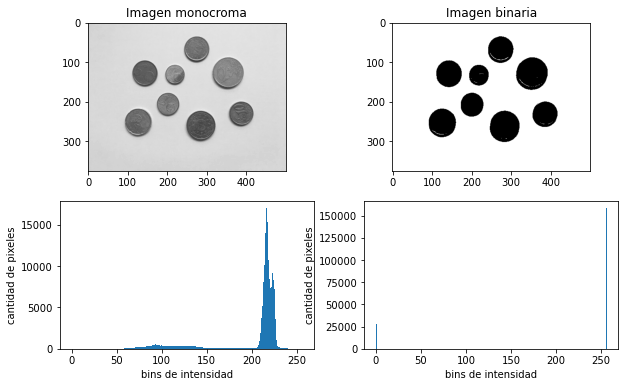

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen binaria')
axs[2].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[2].set_xlabel('bins de intensidad')
axs[2].set_ylabel('cantidad de pixeles')
axs[3].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')
plt.show()

In [ ]:
#continuación
umbral=180
ret1,binaria1 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)
ret2,binaria2 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY_INV)
# Otsu's thresholding
ret3,binaria3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(type(binaria3[0,0]))
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(binaria1, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Binaria')
axs[1].imshow(binaria2, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Binaria Invertida')
axs[2].imshow(binaria3, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Binaria Invertida y con umbral Otsu (automático)')
plt.show()
print('umbral calculado por Otsu:', ret3)


**A partir de la imagen 'ortopantomografia2', obtenga una imagen binaria con unos/true/255 en el lugar de los dientes**

**Otro ejemplo especial**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('sudoku.png',0) #imagen monocroma
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
plt.hist(img.ravel(),256)
plt.show()

In [ ]:
#binarización
umbral=img.mean()
print('el umbral utilizado fue:', umbral)#se elige la media como umbral
ret4,binaria4 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)
print('valores de imagen binaria: ', np.unique(binaria4))
plt.imshow(binaria4, cmap='gray'), plt.axis('off')
plt.show()

### Binarización adaptativa (umbral local: media o media ponderada gaussiana)

In [ ]:
binaria5 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,6)
binaria6 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,6)
plt.imshow(binaria5, cmap='gray'), plt.axis('off')
plt.show()
plt.imshow(binaria6, cmap='gray'),plt.axis('off')
plt.show()

**Ejercicio: A partir de la imagen 'daisy.jpg', calcular una imagen binaria con los bordes de la flor:**

* primero: abrir la imagen y pasar a monocroma
* segundo: aplicar filtro de bordes 

> ayuda: 
> - cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) ó
> - cv2.filter2D(img,CV_64F, kernel,borderType = cv2.BORDER_CONSTANT))

* tercero: binarizar

### ¿Cómo pueden mejorarse las binarizaciones (segmentaciones binarias) encontradas?